In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


/tmp/ipython-input-465114973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-465114973.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

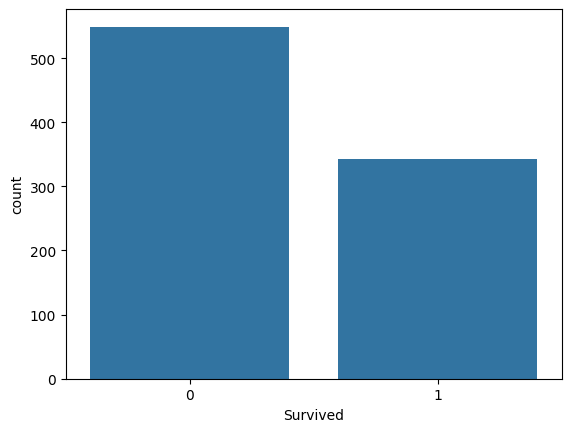

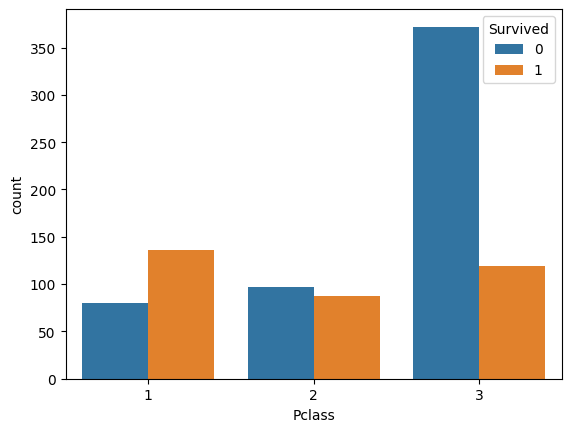

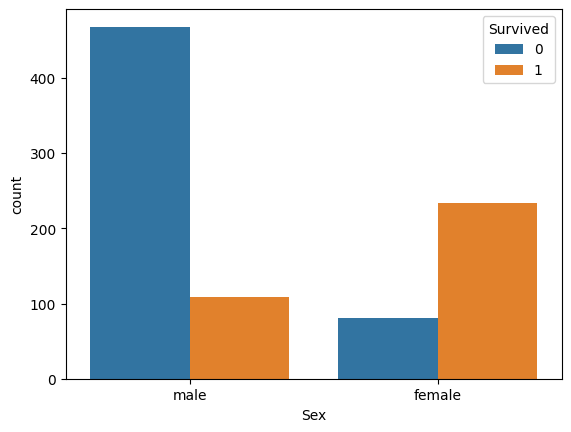

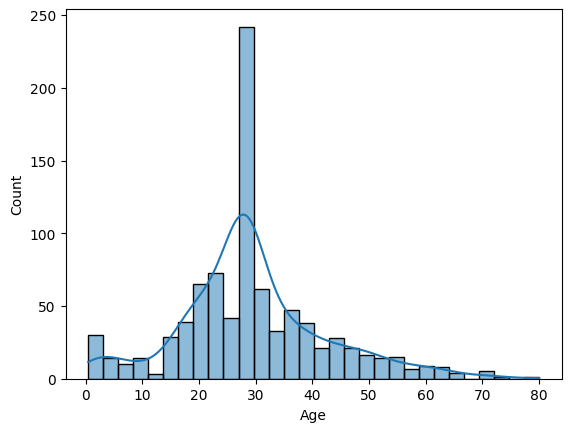

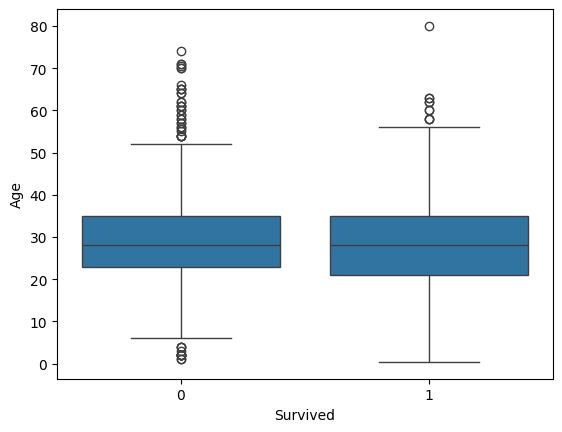

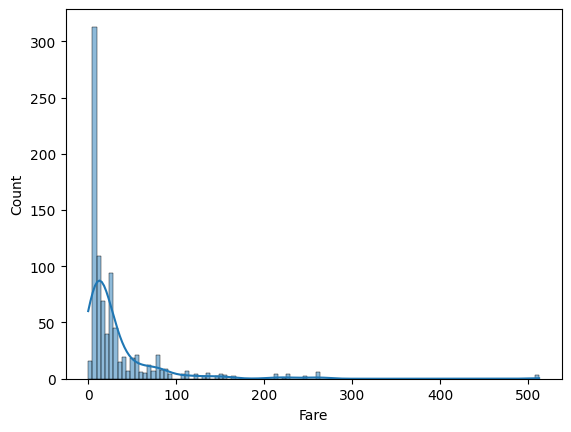

In [5]:
df = pd.read_csv("/content/train.csv")

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

sns.countplot(x="Survived", data=df)
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

sns.histplot(df["Age"], kde=True)
plt.show()

sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

sns.histplot(df["Fare"], kde=True)
plt.show()

In [8]:

label_cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]]
y = df["Survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 0.1351938212761507
R2: 0.4425038317234048


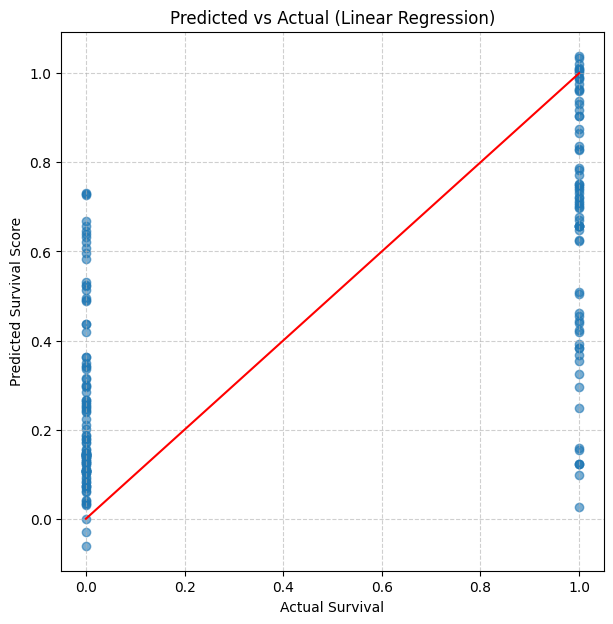

In [10]:

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0,1], [0,1], color="red")
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival Score")
plt.title("Predicted vs Actual (Linear Regression)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

age_range = np.linspace(df["Age"].min(), df["Age"].max(), 200)


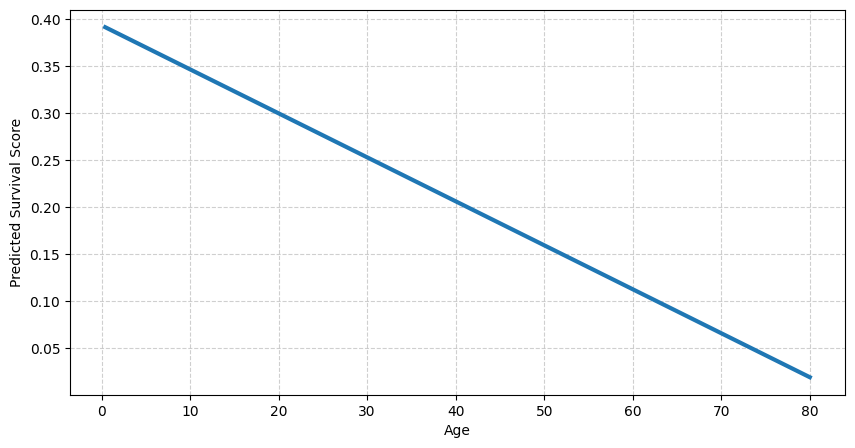

In [11]:
baseline = {
    "Pclass": 2,
    "Sex": df["Sex"].mode()[0],
    "Fare": df["Fare"].median(),
    "SibSp": 0,
    "Parch": 0,
    "Embarked": df["Embarked"].mode()[0]
}

age_df = pd.DataFrame([{**baseline, "Age": a} for a in age_range])
age_df = age_df[X.columns]

age_scaled = scaler.transform(age_df)

pred_scores = model.predict(age_scaled)

plt.figure(figsize=(10,5))
plt.plot(age_range, pred_scores, linewidth=3)
plt.xlabel("Age")
plt.ylabel("Predicted Survival Score")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()